# NumPy

NumPy (Numerical Python) es un módulo de Python para cómputo científico. Esta biblioteca contiene muchas funciones que permiten realizar operaciones de álgebra lineal, generar números pseudo-aleatorios, etc. De forma muy general gran parte del cómputo científico se basa en operar con arreglos de números, a veces estos arreglos representan matrices y vectores y las operaciones utilizadas son fundamentalmente las del algebra lineal. Prácticamente cualquier conjunto de datos puede ser pensado como un arreglo de números. Una imagen puede ser representada como un arreglo bidimensional de números donde cada número representa el brillo de un pixel. Un sonido es un arreglo unidimensional que representa intensidad versus tiempo. Incluso un texto puede ser representado como un vector.

En definitiva para el cómputo científico es necesario contar con formas eficientes de almacenar y manipular arreglos de números. Y NumPy ha sido diseñado para esta tarea. El código escrito en NumPy suele ser más corto que el código equivalente en _Python puro_. El uso de _loops_ es reducido ya que muchas operaciones se aplican directamente sobre arreglos (_arrays_). Esto se conoce como vectorizar el código, internamente los _loops_ siguen estando presentes pero son ejecutados por rutinas optimizadas escritas en lenguajes como C o Fortran. Además, NumPy provee de muchas funciones matemáticas/científicas listas para usar. Esto reduce la cantidad de código que debemos escribir (reduciendo las chances de cometer errores) y más importante, esas funciones están escritas usando implementaciones eficientes y confiables.

Para poder usar NumPy debemos importarlo, la forma más común de importar NumPy es la siguiente:

In [55]:
import numpy as np

## Arreglos (arrays)

NumPy usa una estructura de datos llamada arreglos. Los arreglos de NumPy son similares a las listas de Python, pero son más eficientes para realizar tareas numéricas. La eficiencia deriva de las siguientes características:

* Las listas de Python son muy generales, pudiendo contener objetos de distinto tipo. Los arreglos de NumPy son **homogéneos** solo pueden contener objetos de un mismo tipo.

* En una lista de Python los objetos son asignados dinamicamente, es decir el tamaño de una lista no está predefinidos, siempre podemos agregar más y más elementos. Por el contrario los arreglos de NumPy son **estáticos**. 

Estos dos primeros puntos permiten hacer uso eficiente de la memoria

* Otra razón por la cual los arreglos son más eficientes que las listas es que en Python todo es un objeto, incluso los números! Por ejemplo en C un entero es esencialmente un rótulo que conecta un lugar en la memoria de la computadora cuyos _bytes_ se usan para codificar el valor de ese entero. Sin embargo en Python un entero es un objeto más complejo que contiene más información que simplemente el valor de un número. Esto da flexibilidad a Python, pero el que hay que pagar es el de un lenguaje más lento comparado con C. Este costo es aún mayor cuando combinamos muchos de estos objetos en un objeto más complejo, como por ejemplo enteros dentro de una lista.

Otra ventaja de los arreglos es que se comportan de forma similar a los vectores y matrices usados en matemática, lo que facilita muchas operaciones (al menos si las pensamos matemáticamente).


### Creando arreglos

Existen varias rutinas para [crear](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) arreglos de NumPy a partir de:

* Listas o tuplas de Python
* Rangos numéricos
* Números aletorios
* Ceros y unos
* Archivos

#### A partir de listas y tuplas

Para crear arreglos a partir de listas (o tuplas) podemos usar la funcion `array`:

In [56]:
v = np.array([1, 2, 3, 4 , 5, 6])
v

array([1, 2, 3, 4, 5, 6])

In [57]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

El primer arreglo, `v`, lo creamos a partir de una lista y es por lo tanto unidimensional, mientras que el segundo `M` lo creamos a partir de una lista de listas y resulta en un arreglo bidimensional.

Los arreglos tienen `atributos` como por ejemplo su `shape`:

In [58]:
v.shape, M.shape

((6,), (3, 3))

O sus dimensiones:

In [59]:
v.ndim, M.ndim

(1, 2)

#### A partir de un rango numérico

Una forma de crear arreglos desde cero es usando rangos. Por ejemplo podemos crear un arreglos conteniendo números igualmente espaciados en el intervalo [desde, hasta), usando **arange**.

In [60]:
np.arange(0, 10,1)  # desde, hasta(sin incluir), paso (el paso es opcional!)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Otra función para crear rangos es **linspace** que devuelve numeros igualmente espacios en el intervalo [desde, hasta] (es decir incluyendo el _hasta_). Otra diferencia con **arange** es que no se especifica el _paso_ si no la cantidad total de números que contendrá el arreglo.

In [61]:
np.linspace(1, 10, 25)  # desde, hasta, elementos (elementos es opcional)

array([  1.   ,   1.375,   1.75 ,   2.125,   2.5  ,   2.875,   3.25 ,
         3.625,   4.   ,   4.375,   4.75 ,   5.125,   5.5  ,   5.875,
         6.25 ,   6.625,   7.   ,   7.375,   7.75 ,   8.125,   8.5  ,
         8.875,   9.25 ,   9.625,  10.   ])

#### A partir de números aleatorios

Los números aleatorios son usados en muchos problemas científicos. En la práctica las computadoras son solo capaces de generar números pseudo-aleatorios. Python usa un algortimo llamado [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_twister) para generar números pseudo-aleatorios. Este algorítmo es más que suficiente para fines científicos, pero no es útil en caso que necesitemos números pseudo-aleatorios para usar en criptografía. Resumiendo para nuestros fines podemos asumir que los números pseudo-aleatorios que generaremos a lo largo del curso son realmente números aleatorios. 

Todas las rutinas de NumPy para generar números aleatorios viven dentro del módulo [random](http://docs.scipy.org/doc/numpy/reference/routines.random.html). 

La función mas simple es `rand`. Esta función crea un arreglo de números en el intervalo [0, 1). Dentro de ese intervalo los números son equiprobables, es decir es una distribución uniforme. El argumento de `rand` son las dimensiones del arreglo resultante.

In [62]:
np.random.rand(2, 5)  # arreglo con forma (2, 5)

array([[ 0.44322521,  0.98905818,  0.86174892,  0.38338773,  0.15103188],
       [ 0.80972632,  0.66137016,  0.75427928,  0.17072333,  0.2513866 ]])

De forma similar `randn`(noten la `n` al final) devuelve muestras a partir de la distribución normal estándar (media = 0, desviación estándar = 1), según las dimensiones que especifiquemos.

In [63]:
np.random.randn(10)

array([-0.40873789, -0.35110561, -0.26618048, -0.80261596, -1.36535784,
        0.03736243, -0.38910096, -0.34446806,  0.27151079,  0.30317357])

## Indexado y rebanado de arreglos

Los arreglos de NumPy, al igual que las listas se pueden indexar, y se pueden tomar rebanadas (_slices_). La sintaxis es una generalización de la usada para las listas de Python. Una de las diferencias es que podemos indexar de acuerdo a las distintas dimensiones de un arreglo.

In [64]:
M[0]  # el primer elemento de M

array([1, 2, 3])

In [65]:
M[0, 1] # el primer elemento de M y de lo que obtenemos el segundo elemento

2

In [66]:
M[1:]  # a partir de la fila 1, todo

array([[4, 5, 6],
       [7, 8, 9]])

In [67]:
M[1,:]  # solo la fila 1 (o la fila 1 en la primer dimensión y todo en el resto de las dimensiones)

array([4, 5, 6])

In [68]:
M[:,1]  # solo la columna 1 (o todo en la primer dimensión y la columna 1 en el resto de las dimensiones)

array([2, 5, 8])

In [69]:
M[:,1:]  # todas las columnas a partir de la columna 1

array([[2, 3],
       [5, 6],
       [8, 9]])

In [70]:
M[::-1]  # los elementos de M en reversa

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

Es importante notar que al tomar rebanadas NumPy NO genera un nuevo arreglo, si no una vista (_view_) del arreglo original. Por lo tanto si a una rebanada le asignamos un número, se lo estaremos asignando al arreglo original, como se puede ver en el siguiente ejemplo.

In [71]:
M[0, 0] = 0
M

array([[0, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Distinto es asignar la rebanada a una variable y luego modificar esa variable:

In [72]:
a = M[0, 0]
a = 42
M

array([[0, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Para crear copias se puede  usar la función `np.copy()` o el método `.copy()`.

## Funciones Universales (Ufunc)

NumPy provee de varias funciones matemáticas. Esto puede parecer redundante ya que la biblioteca estándar de Python ya provee de este tipo de funciones. La diferencia es que la funciones matemáticas de NumPy (como otras funciones) puede ser aplicadas en un solo paso a todos los elementos de un arreglo.

Por ejemplo, si quisieramos calcular la raíz cuadrada de todos los elementos de una lista de Python deberíamos hacer un loop sobre cada elementos de la lista y computar la raíz cuadrada a cada elemento (y posiblemente almacenarlo en otra lista). Con NumPy podemos hacer esto en una sola linea:

In [73]:
np.sqrt(M)

array([[ 0.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974],
       [ 2.64575131,  2.82842712,  3.        ]])

Funciones como `sqrt`, que operan sobre arreglos _elemento-a-elemento_ se conocen como [funciones universales](http://docs.scipy.org/doc/numpy/reference/ufuncs.html) (usualmente abreviadas como `ufunc`).

Una de las ventajas de usar `ufuncs` es que permite escribir código más breve. Otra ventaja es que los cómputos son más rápidos que usando loops de Python. Detrás de escena NumPy si realiza un loop, pero este se ejecuta en un lenguaje como C o Fortran, por lo que hay una ganancia considerable en velocidad, respecto de código en _Python puro_. Además, el código usado por NumPy es código que suele estar optimizado gracias a los años de labor de programadores/científicos.

Esta forma de omitir loops y escribir operaciones sobre vectores se llama _vectorización_.

Veamos otro ejemplo, como sumar todos los elementos de un arreglo.

In [74]:
np.sum(M)

44

En el ejemplo anterior la suma se hizo sobre todos los números contenidos en el arreglo, sin respetar sus dimensiones. En muchas ocaciones es preferible hacer operaciones sobre alguna dimensión en particular, por ejemplo sumar _a lo largo de_ las columnas o sumar _a lo largo_ de las filas. Las dos siguientes celdas muestran como hacer esto:

In [75]:
np.sum(M, axis=0)

array([11, 15, 18])

In [76]:
np.sum(M, axis=1)

array([ 5, 15, 24])

Un _arreglo_ tendrá tantos `axis` como dimensiones. 

## Broadcasting

Otro elemento que facilita vectorizar código es la capacidad de operar sobre arreglos que no tienen las mismas dimensiones. Esto se llama _broadcasting_ y no es más que un conjunto de reglas que permiten aplicar operaciones binarias (suma, multiplicación etc) a arreglos de distinto tamaño.

Consideremos el siguiente ejemplo.

In [77]:
a = np.array([0, 1, 2])
b = np.array([2, 2, 2])
a + b

array([2, 3, 4])

Esto no es nada sorprendente lo que hemos hecho es sumar elemento a elemento. Fíjense que el arreglo `b` contiene 3 veces el número `2`. Gracias al broadcasting es posible obtener el mismo resultado al hacer:

In [78]:
a + 2

array([2, 3, 4])

In [79]:
M + b

array([[ 2,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

En ambos casos lo que está sucediendo _es como si_ antes de realizar la suma extendieramos una de las partes hasta que las dimensiones coincidan, por ejemplo repetir 3 veces el número `2` o tres veces el vector `b`. En realidad tal  _repetición_ no se realiza, pero es una  forma útil de pensar la operación.

Es claro que el broadcasting NO puede funcionar para cualquier par de arreglos. La siguiente operación funciona

In [80]:
M[1:,:] + b

array([[ 6,  7,  8],
       [ 9, 10, 11]])

mientras que la siguiente dará  un error

In [81]:
M + b[:2]

ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

El error es claro, NumPy no sabe como hacer para _encajar_ las dimensiones de estos dos  arreglos. Más detalles sobre broadcasting [aqui](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

## Comparasiones y máscaras de booleanos

Así como es posible sumar un número a un arreglo, es posible hacer comparaciones elemento-a-elemento. Por ejemplo podemos preguntar que valores de `M` son mayores a 3, el resultado sera una `array` con booleanos.

In [82]:
M > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

Es muy común usar expresiones como las anteriores para obtener, de un `array` dado solo aquel subconjunto de valores que cumplen con cierto criterio, como:

In [83]:
M[M > 3]

array([4, 5, 6, 7, 8, 9])

o incluso combinando arreglos, como:

In [84]:
M[a == 2]

array([[7, 8, 9]])

## Medidas de centralidad y dispersión (usando NumPy)


En el capítulo anterior vimos como usar Python para calcular la media, la mediana y la varianza. NumPy incluye funciones (y métodos) ya definidos para calcular estas cantidades. Para calcular la media de los valores en un `array` simplemente hacemos.

In [85]:
np.mean(v)

3.5

Una forma alternativa es usar el método `.mean()`

In [86]:
v.mean()

3.5

In [87]:
print('varianza {:.2f}'.format(np.var(v)))
print('desviación estándar {:.2f}'.format(np.std(v)))

varianza 2.92
desviación estándar 1.71


### Cuantil

Además de la varianza existen otras formas de describir la dispersión de los datos. Una de ellas es el rango. Es decir la diferencia entre el valor más grande y el más chico en un conjunto de datos. Un problema con el rango es que es muy sensible a los valores extremos, después de todo se define como la resta de los dos valores más extremos. Una alternativa es calcular un rango pero truncado, es decir dejando de lado valores hacia ambos extremos. Esto se puede hacer con los cuantiles.

Los [cuantiles](https://en.wikipedia.org/wiki/Quantile) son puntos de corte que dividen al conjunto de datos en grupos de igual tamaño. Existen varios nombres para los cuantiles según la cantidad de divisiones que nos interesen.

* Los cuartiles son los tres puntos que dividen a la distribución en 4 partes iguales, se corresponden con los cuantiles 0.25, 0.50 y 0.75.
* Los quintiles dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80).
* Los deciles dividen a la distribución en diez partes.
* Los percentiles dividen a la distribución en cien partes.
* La mediana es el percentil 50 o el cuartil 0.5.
    
En Python el cálculo de estos estadísticos puede realizarse fácilmente usando funciones predefinidas en NumPy.

In [88]:
x = np.random.normal(0, 1, 100)
'percentiles 25={:.2f}; 50={:.2f}; 75={:.2f}'.format(*(np.percentile(x , [25, 50, 75])))

'percentiles 25=-0.47; 50=0.14; 75=0.74'

Como ya adelantamos podemos calcular rangos usando cuantiles. El más común de estos rangos es el rango intercuartil, el cual se calcula como:

$$IQR = q3 − q1 = p75-p25$$

y usando NumPy

In [89]:
np.diff(np.percentile(x , [25, 75]))

array([ 1.20471443])

## Gráficos

Los gráficos ocupan un lugar central en la estadística moderna y en la ciencia de datos, ya sea en el análisis exploratorio de datos o en procesos de inferencia.

Existen varias bibliotecas para hacer gráficos en Python, Matplolib es una de las más usadas. La forma más común de importarla es:

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

La primer línea es para decirle a la Notebook que los gráficos queden _embebidos_ en la notebook (si no estuvieramos usando la notebook no escribiríamos esta línea).

La segunda línea es la forma estándar de importar matplotlib. Fíjense que al escribir `as plt` estamos diciendo que accederemos a las funciones contenidas en `matplotlib.pyplot` como `plt`, esto lo hacemos ya que escribir `plt` es más cómodo que escribir `matplotlib.pyplot`.

Veamos como hacer un gráfico sencillo.

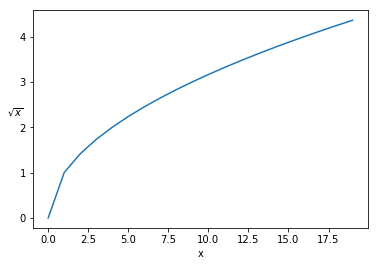

In [91]:
x = range(20)
y = [i ** 0.5 for i in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$\sqrt{x}$', rotation=0);

* En la primer y segunda línea estamos "generando" datos.
* En la tercer línea decimos que queremos generar un gráfico del tipo `plot` (ya veremos que los hay de otros tipos), donde graficaremos `x` vs `y`.
* En la cuarta y quinta línea agregamos rótulos a los ejes. En la quinta línea usamos la misma notación usada por [$LaTeX$](https://es.wikipedia.org/wiki/LaTeX) para escribir fórmulas matemáticas. $LaTeX$ es un _lenguaje_ para escribir textos que es muy usado en muchas disciplinas científicas para escribir papers, posters, diapositivas, libros, etc.

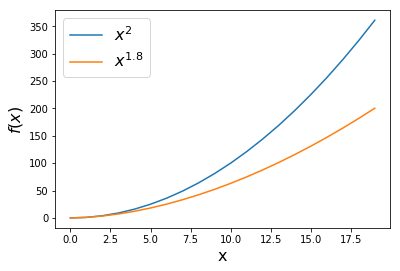

In [92]:
x = range(20)
y = [i ** 2 for i in x]
z = [i ** 1.8 for i in x]
plt.plot(x, y, label=r'$x^2$')
plt.plot(x, z, label=r'$x^{1.8}$')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$f(x)$', fontsize=16)
plt.legend(fontsize=16);

Existen muchos tipos de gráficos para representar datos. A continuación veremos cinco representaciones comunes de datos unidimensionales:

* histogramas
* _kernel plots_
* _stripplot_
* _box plots_
* _violin plots_

### Histogramas

En un [histograma](https://en.wikipedia.org/wiki/Histogram) se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos, mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de _bins_ que se usan. Si usamos unos pocos _bins_ no lograremos capturar la estructura de los datos, si usamos demasiados _bins_ no solo estaremos representando la estructura de los datos si no también el ruido. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

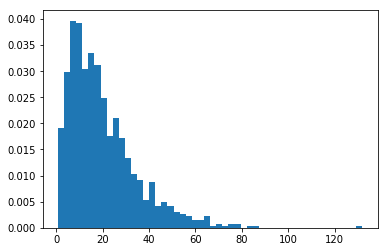

In [93]:
x = np.random.gamma(2, 10, size=1000)
#x = np.random.normal(0, 1, size=1000)

plt.hist(x, bins=50, normed=True, cumulative=False);  # probá cambiar los bins, y los demás argumentos.

Aprovechando lo que hemos aprendido generemos un gráfico que muestre la diferencia entre media y mediana

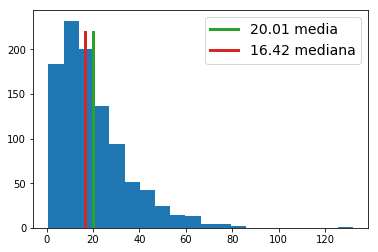

In [94]:
plt.hist(x, bins=20)
media = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='C2', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='C3', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14);

### Kernel Density plot

Es una forma _suavizada_ de un histograma. Un gráfico [_KDE_](https://en.wikipedia.org/wiki/Kernel_density_estimation) se dibuja de la siguiente forma: se reemplaza cada dato por una distribución Gaussiana y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el de _kernel_. Cualquier función simétrica cuya integral sea 1 puede ser usada como kernel, la Gaussiana es uno de los kernels más usado.

De forma análoga a lo que sucede con los _bins_ los KDE son sensibles a un parámetro llamado _bandwith_. Existen varias _heurísticas_ (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el _bandwith_ de forma automática de acuerdo a los datos.

Es posible usar matplotlib para graficar un kde, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada Seaborn, la cual _no es más_ que una colección de funciones escritas usando matplotlib.

In [95]:
import seaborn as sns
#sns.set_palette('colorblind')

Usando Seaborn, podemos hacer un kde de forma muy simple

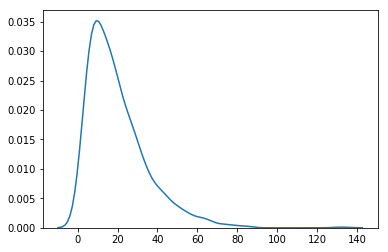

In [96]:
sns.kdeplot(x);  #también ver la función sns.distplot()

Como Seaborn está escrito usando Matplotlib, podemos modificar los gráficos realizados con Seaborn usando Matplotlib. Un sencillo ejemplo que muestra que esto es posible es el siguiente:

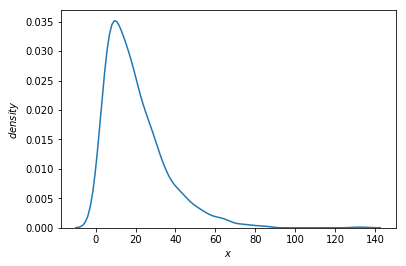

In [97]:
sns.kdeplot(x)
plt.xlabel('$x$')
plt.ylabel('$density$');

### Stripplot

Este tipo de gráfico sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función _stripplot_ de seaborn (un gráfico similar es el _swarmplot_). Los stripplot se suelen graficar agregado un poco de ruido/fluctuaciones (_jitter_ en inglés) a lo largo del eje de las $x$, esto es simplemente un _truco_ para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma línea ya que las variables categóricas no tienen dispersión.

Puede ser útil en si mismo o puede ser usado superpuesto sobre un _boxplot_ o _violinplot_. 

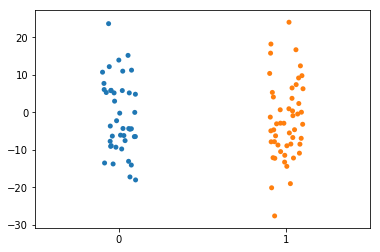

In [98]:
y0 = np.random.normal(0, 10, size=42)
y1 = np.random.normal(-1, 10, size=50)
sns.stripplot(data=[y0, y1], jitter=True);

### Gráficos de cajas o de bigotes (Box plot o Wisker-plot)

Los [gráficos de caja](https://en.wikipedia.org/wiki/Box_plot) son una forma de graficar distribuciones basadas en cuartiles. Al igual que el _stripplot_ este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultáneo. La caja está delimitada por el primer y tercer cuartil, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un boxplot, a veces se usa una desviación estandar, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango intercuartil y los valores por fuera de los bigotes se suelen considerar como datos aberrantes (ver más adelante).

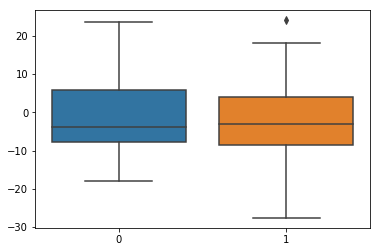

In [99]:
sns.boxplot(data=[y0, y1]);

### Gráficos de violín (violin plot)

Los gráficos de [violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde.

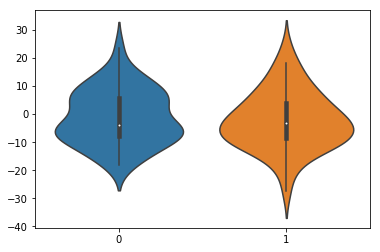

In [100]:
sns.violinplot(data=[y0, y1]);

### Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los datos aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato _aberrante_ fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento!

Existen varios criterios para identificar datos aberrantes. Dos muy usados son:
   * todo valor por debajo de $\mu$-n$\sigma$ y por encima de $\mu$+n$\sigma$. Donde n = 1, 2, 3, 6 etc...
   * Se define el rango intercuartil como $IQR = q3 − q1 = p75-p25$ y se define como _aberrante_ todo valor por debajo de $q1-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas, mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación estándar. El valor de 1.5 es totalmente arbitrario y un valor que se viene usando desde que esta idea fue propuesta. Si nuestros datos son aproximadamente gaussianos, entonces este criterio excluye menos del 1% de los datos.

Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estandar. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandar, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7 es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estandard, el 95 dentro de 2 y el 99.7 dentro de 3.

## Relación entre dos variables

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque _sns.kdeplot()_ soporta la visualización de dos variables). En muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

###  Gráfico de dispersión

Un [gráfico de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) es un gráfico científico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultáneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [101]:
x = np.random.normal(size=1000)
y = np.random.normal(loc=x, scale=1)

Usando matplotlib podemos graficar ambas variables usando la función _scatter_

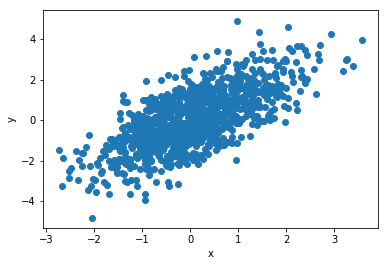

In [102]:
plt.scatter(x, y, alpha=1)
plt.xlabel('x')
plt.ylabel('y');

Seaborn provee de múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función _joinplot_. Esta función además de mostrar el gráfico de dispersión muestra las distribuciones marginales de $x$ e $y$.

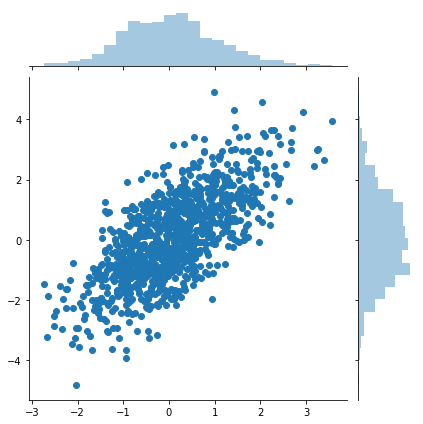

In [103]:
sns.jointplot(x, y,  kind='scatter', stat_func=None);

El siguiente gráfico usa un _kernel density estimation_ como vimos anteriormente, lo hace tanto para las distribuciones marginales como para la distribución conjunta.

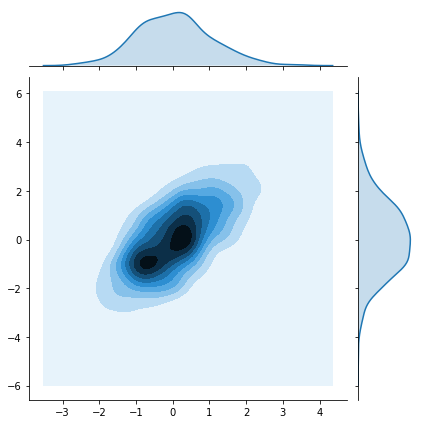

In [104]:
sns.jointplot(x, y,  kind='kde', stat_func=None);

Un gráfico de _hexbin_ es similar a un histograma, pero bidimensional. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente porque las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más simétrica. 
* Los hexágonos son el polígono con mayor número de lados que mejor cubren ([teselan](https://es.wikipedia.org/wiki/Teselado)) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Un malla cuadrada hace que tendamos a mirar en sentido horizontal y vertical.

Los hexbin son útiles cuando necesitamos visualizar muchos datos. Por muchos me refiero a números por encima de las centenas de miles de datos. Cuando tenemos una gran cantidad de datos los puntos empiezan a superponerse y puede que ciertos patrones pasen desapercibidos, por lo que visualizar datos agrupados y no los datos _crudos_ suele ser buena idea. Además calcular los _hexbin_ tiene un costo menor que los KDE.

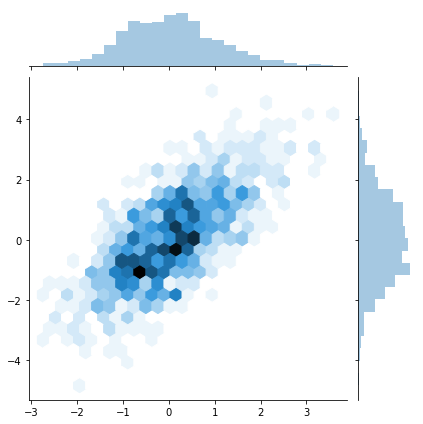

In [105]:
sns.jointplot(x, y,  kind='hex', stat_func=None);  # ver también plt.hexbin();

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión _común_, es hacer los puntos semitransparentes. En matplotlib la transparencia de los objetos es controlada mediante un parámetro llamado _alpha_ que va entre 0 y 1. Este es un buen momento para volver algunas celdas atrás y ver como este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### Correlación

Al trabajar con dos variables resulta por lo general interesante preguntarse por la relación entre ellas. Decimos que dos variables están relacionadas si una provee _información_ sobre la otra. Si en cambio una variable no ofrece información sobre otra decimos que son independientes. 

La correlación es una medida de la dependencia de dos variables. Existen varios coeficientes de correlación el más comunmente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estándar:

$$\rho_{(x,y)}={E[(x-\mu_x)(y-\mu_y)] \over \sigma_x\sigma_y}$$

En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica como varia una variable al variar la otra respecto de la variación intrínseca de cada una de las variables.

¿Por qué usar el coeficiente de Pearson y no directamente la covarianza? Porque al dividir por el producto de las varianzas estámos estandarizando el coeficiente y por lo tanto simplificando su interpretación al hacerlo independiente de las unidades de nuestras variables. Al dividir por las desviaciones estándar, obtenemos una cantidad que varía entre -1 y 1 y que no tiene dimensiones! 

La función _joinplot_, que vimos en el apartado anterior, por defecto nos devuelve el valor del coeficiente de correlación de Person, junto con un _valor p_ cuyo significado estudiaremos en el capítulo sobre estadística frecuentista.

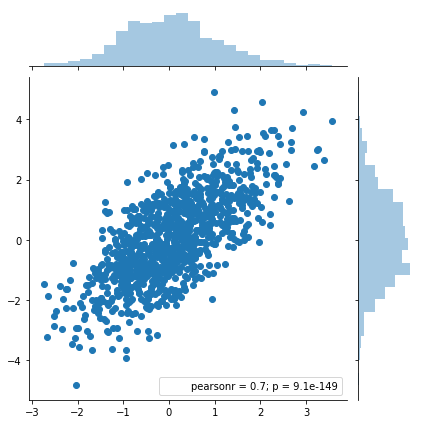

In [106]:
sns.jointplot(x, y,  kind='scatter');

Identificar correlaciones puede ser útil para entender como dos variables se relacionan y para predecir una a partir de la otra. Es por ello que muchas veces además de visualizar la relación entre variables se estiman modelos que _ajustan_ a los datos. Como por ejemplo líneas rectas. En los próximos capítulos veremos como crear modelos lineales y no-lineales. Por ahora simplemente nos conformaremos con dejar que seaborn ajuste los datos a un recta por nosotros.

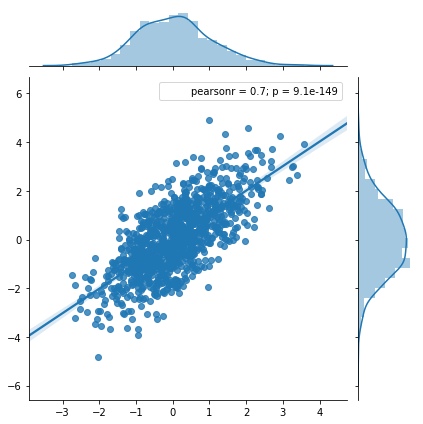

In [107]:
sns.jointplot(x, y,  kind='reg');

En la siguiente imagen se puede ver varios conjuntos de datos y sus respectivos coeficientes de correlación de Pearson. Es importante notar que el coeficiente de correlación de Pearson refleja la linearidad y la dirección de dicha linearidad (primera fila), pero no la pendiente de dicha relación (fila del medio). Tampoco es capaz de capturar relaciones no-lineales. En la fila del medio la línea con pendiente cero tiene un coeficiente de correlación de Pearson indefinido, ya que la varianza de la variable $y$ es 0.

<img src='imagenes/Correlación.png' alt="correlación", width=600, height=600> 

#### Correlación y causalidad

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones [espurias](http://www.tylervigen.com/). Por ejemplo en la siguiente figura se puede ver que el número de piratas y la media de la temperatura global están inversamente correlacionados.

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/de/PiratesVsTemp%28en%29.svg/1024px-PiratesVsTemp%28en%29.svg.png' alt="Pirates_temp", width=600, height=600> 

Este gráfico fue creado a propósito para ilustrar, entre otros puntos, que correlación no implica causalidad (nótese además que el orden de los datos en el eje $x$ es erróneo y la escala es al menos _problemática_). Para más detalles del origen de esta gráfica leer esta entrada de [wikipedia](https://es.wikipedia.org/wiki/Pastafarismo#Los_piratas_y_el_calentamiento_global) 

La aparente relación entre las variables temperatura media y cantidad de piratas podría ser explicada de varias formas, quizá es pura casualidad o quizá se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado aumentando la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero ¡no es cierto que podamos contrarrestar el calentamiento global simplemente aumentando la cantidad de piratas!

Para poder establecer una relación causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica  causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd">

## Para seguir leyendo

* [wikipedia :-)](http://en.wikipedia.org)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Data Analysis with Open Source Tools](http://shop.oreilly.com/product/9780596802363.do)

## Ejercicios

1) Existen muchas otras operaciones que se pueden hacer sobre arreglos y muchas otras funciones que ofrece NumPy. Explorá las siguientes funciones de NumPy:

* `reshape`
* `concatenate`
* `hstack`
* `vstack`
* `split`
* `flatten`
* `sort`
* `argsort`
* `loadtxt`


Usá los métodos de instrospección que ofrece Jupyter y la [documentación de NumPy](https://docs.scipy.org/doc/numpy/user/index.html)·

2) Explorá la documentación de NumPy y buscá alguna función que no hayamos visto en esta notebook ni en el ejemplo anterior. Explica brevemente que hace y genera un ejemplo simple de aplicación.

3) Generar datos gaussianos con np.random.randn(size=s) donde s es igual a 10, 100 o 1000 y para cada caso contar cuantos puntos son outliers de acuerdo a la regla del rango intercuartil (usando el valor de 1.5) y cuantos valores son _aberrantes_ usando 2 y 3 desviaciones stándard. Para asegurarse de tener numeros _confiables_ repetir el ejercicio varias veces para cada "s" y reportar el número promedio de datos aberrantes y su desviación estándar.